# **Introduction to Neural Network Classification**

## Creating Data

In [1]:
import tensorflow as tf

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0" : X[:,0], "X1" : X[:,1], "label" : y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [6]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

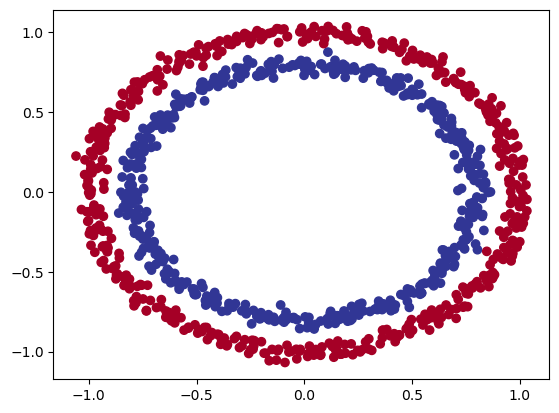

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdYlBu");

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
len(X), len(y)

(1000, 1000)

In [10]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Modelling

In [11]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)

model_1.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.3902 - accuracy: 0.4510
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7121 - accuracy: 0.5010
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4960
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.4830


In [12]:
model_1.fit(X,y, epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5060
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4980
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4730
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4760
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4580
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5040
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4960
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4770
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4800
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4800
Epoch 11/

In [13]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) 
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X, y, epochs=100, verbose=0)

In [14]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

## Improving Model

In [15]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_3.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.4199 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.4710
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4840
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4510
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5270
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4650
Epoch 11/

In [16]:
import numpy as np

In [17]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


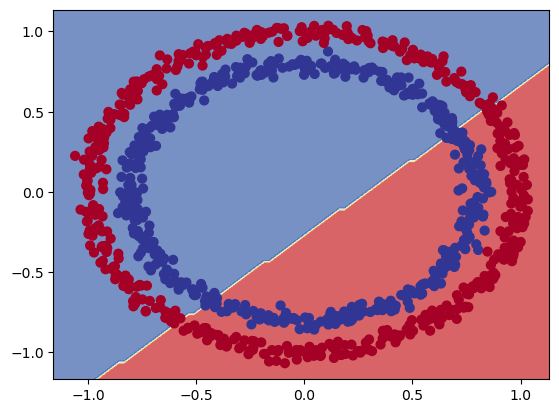

In [18]:
plot_decision_boundary(model_3,X,y)

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
#             y_reg_train,
#             epochs=100)

In [20]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) 

model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 2ms/step - loss: 470.8316 - mae: 470.8316
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 334.9965 - mae: 334.9965
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 204.2032 - mae: 204.2032
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 71.9874 - mae: 71.9874
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 78.2569 - mae: 78.2569
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 96.4025 - mae: 96.4025
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 62.0889 - mae: 62.0889
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 48.7162 - mae: 48.7162
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 50.2322 - mae: 50.2322
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 43.6413 - mae: 43.6413
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 4ms/step


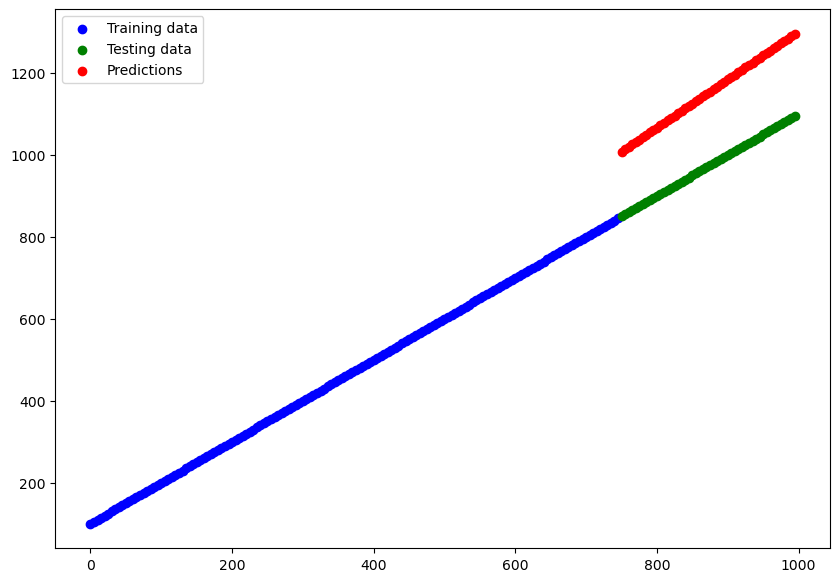

In [21]:
y_reg_preds = model_3.predict(y_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

## Non-Linearity

In [22]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

model_4.compile(
    loss = tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"]
)

history = model_4.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.0986 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0361 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9836 - accuracy: 0.4880
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9436 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9089 - accuracy: 0.4880
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8461 - accuracy: 0.4870
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8294 - accuracy: 0.4870
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 5.7772 - accuracy: 0.4840
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7156 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6509 - accuracy: 0.4810
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


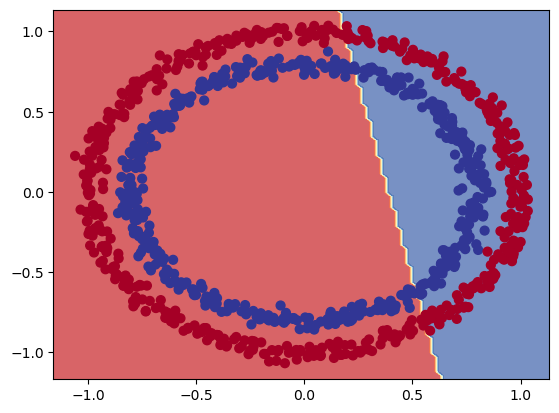

In [23]:
plot_decision_boundary(model_4, X,y)

In [24]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history = model_5.fit(X,y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.3273 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 3.1086 - accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 2.9279 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 2.7552 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 2.6524 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 2.3718 - accuracy: 0.4760
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 2.0450 - accuracy: 0.4730
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.5828 - accuracy: 0.4770
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.5379 - accuracy: 0.4720
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 1.5094 - accuracy: 0.4720
Epoch 11/

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


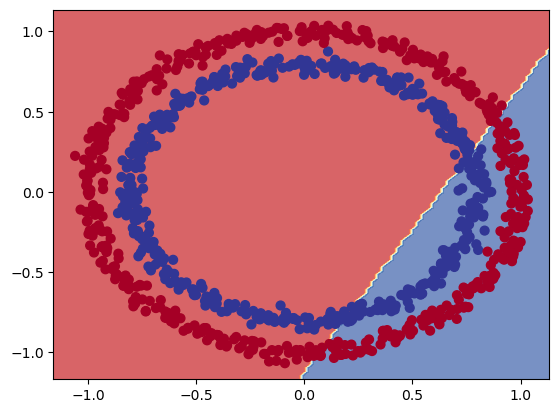

In [25]:
plot_decision_boundary(model_5, X,y)

In [26]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(5, activation=tf.keras.activations.relu), 
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), 
  tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

history = model_6.fit(X, y, epochs=100)

Epoch 1/100


c:\Users\mbatu\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 1s 3ms/step - loss: 3.1384 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 2.8301 - accuracy: 0.4780
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 2.5721 - accuracy: 0.4200
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.7883 - accuracy: 0.4430
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9341 - accuracy: 0.4580
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8574 - accuracy: 0.4650
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8280 - accuracy: 0.4650
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8057 - accuracy: 0.4590
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7896 - accuracy: 0.4480
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7763 - accuracy: 0.4340
Epoch 11/100
32/32 [=

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


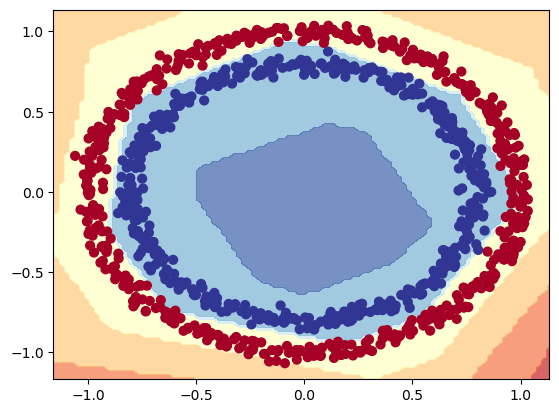

In [27]:
plot_decision_boundary(model_6, X,y)

In [28]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(1, activation= "sigmoid")
])

model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_7.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5240
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5190
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.5320
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.5340
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5560
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.5450
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.6080
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.6240
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.5870
Epoch 11/

In [29]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0091 - accuracy: 0.9990


[0.009077652357518673, 0.9990000128746033]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


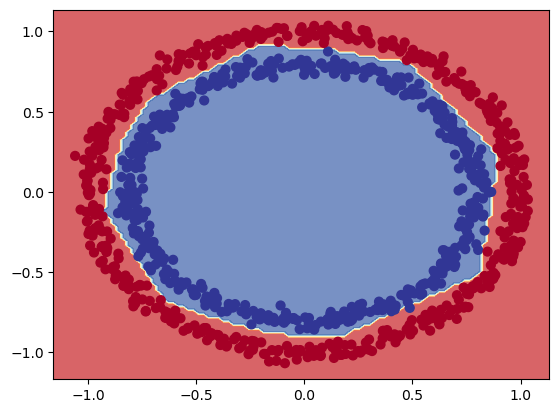

In [30]:
plot_decision_boundary(model_7, X, y)

## Improve Classification Model

In [31]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape

((800, 2), (200, 2))

In [32]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics=["accuracy"]
)

history = model_8.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.7040 - accuracy: 0.4600
Epoch 2/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5100
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5575
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.6100
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.6775
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.6900
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.7237
Epoch 8/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6140 - accuracy: 0.7500
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.7613
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.7700
Epoch 11/50
25/25 [

In [33]:
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 1ms/step - loss: 0.0551 - accuracy: 0.9900
Model loss on the test set: 0.05512946471571922
Model accuracy on the test set: 99.00%


313/313 [==============================] - 1s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


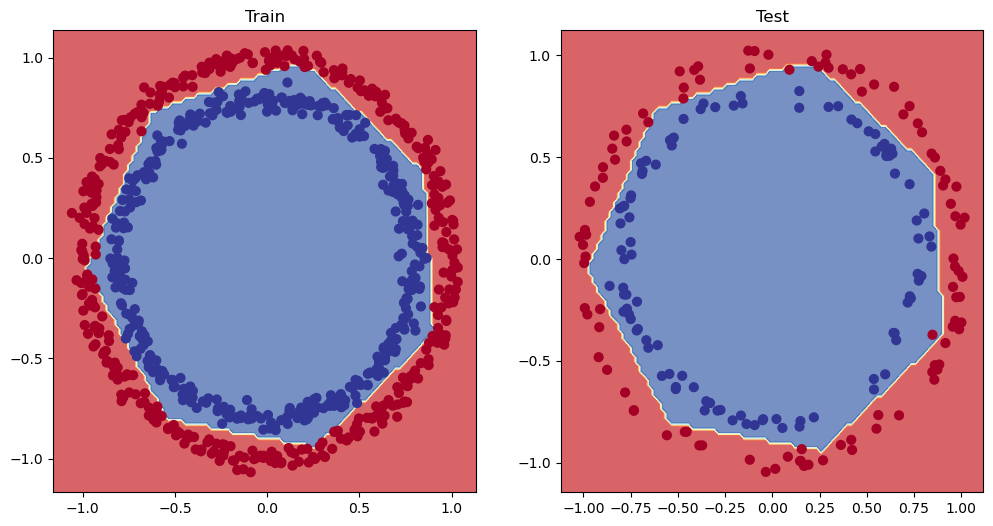

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [35]:
pd.DataFrame(history.history).head()

,loss,accuracy
0,0.704037,0.4600
1,0.692073,0.5100
2,0.686948,0.5575
3,0.679591,0.6100
4,0.670357,0.6775


In [36]:
pd.DataFrame(history.history).tail()

,loss,accuracy
45,0.042107,0.99250
46,0.039360,0.99500
47,0.039443,0.99500
48,0.042641,0.99125
49,0.038706,0.99250


Text(0.5, 1.0, 'Model 8')

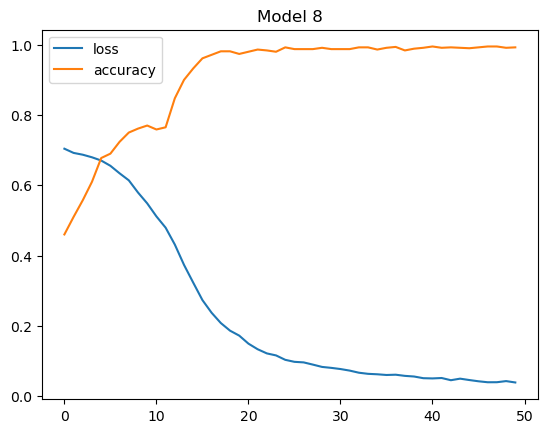

In [37]:
pd.DataFrame(history.history).plot()
plt.title("Model 8")

In [40]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics = ["accuracy"]
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 4 * 10**(epoch/20))

history = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.6925 - accuracy: 0.4950 - lr: 4.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.4775 - lr: 4.4881e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.4800 - lr: 5.0357e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.4775 - lr: 5.6502e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.4837 - lr: 6.3396e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4800 - lr: 7.1131e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.4850 - lr: 7.9810e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.4837 - lr: 8.9549e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

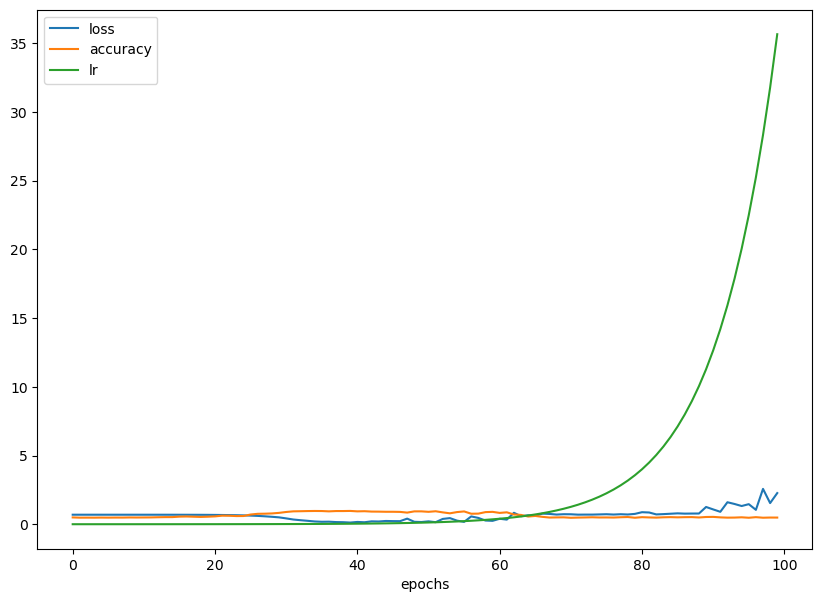

In [42]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

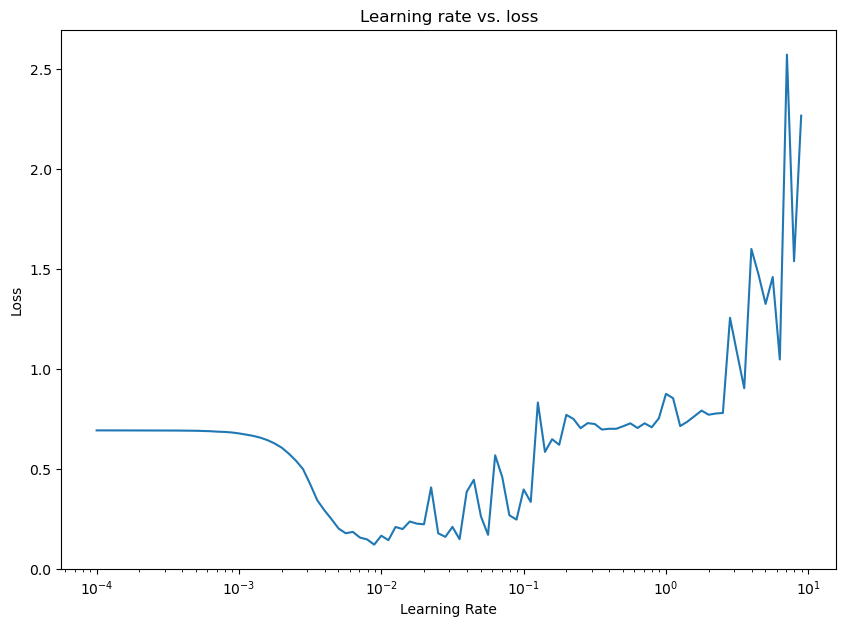

In [41]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [51]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), 
                metrics=["accuracy"])

history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6958 - accuracy: 0.4688
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5263
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.5750
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.6325
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6043 - accuracy: 0.7312
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5445 - accuracy: 0.7825
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.8462
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3655 - accuracy: 0.9150
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2906 - accuracy: 0.9438
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2195 - accuracy: 0.9762
Epoch 11/20
25/25 [

In [52]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0654 - accuracy: 0.9850


[0.06540469080209732, 0.9850000143051147]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


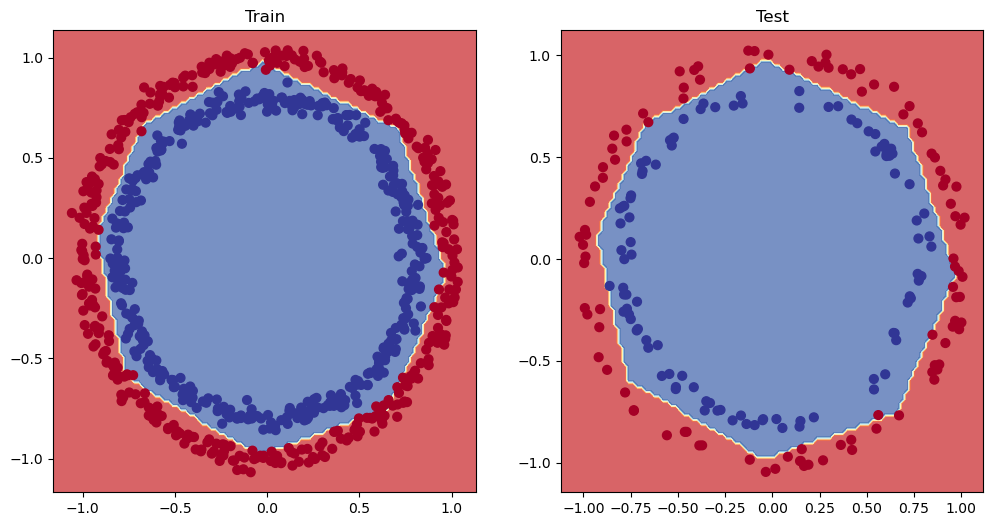

In [53]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## Metrics

In [54]:
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0654 - accuracy: 0.9850
Model loss on test set: 0.06540469080209732
Model accuracy on test set: 98.50%


In [55]:
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)

confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [56]:
confusion_matrix(y_test, tf.round(y_preds))

array([[98,  3],
       [ 0, 99]], dtype=int64)

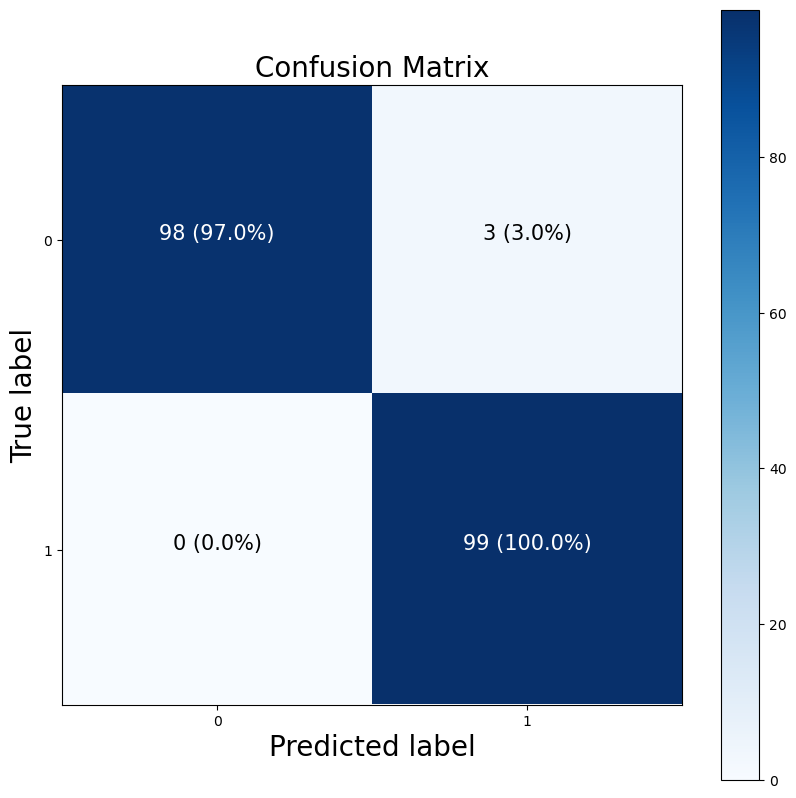

In [57]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)